In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import shapiro
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [15]:
df_2023= pd.read_csv('data/2023/외래관광객조사_2023_전처리2.csv')
df_2024= pd.read_csv('data/2024/외래관광객조사_2024_전처리2.csv')

In [16]:
df_2023

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,...,Q8a12,Q8_1a1,Q8_1a2,Q8_1a3,동행자유형,국가명,웰니스참여,웰니스만족,log_총액,year
0,3,27,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8,1.0,2.0,혼자,대만,0,0,6.996874,2023
1,1,7,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11,2.0,3.0,혼자,중국,1,1,7.390971,2023
2,1,71,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,4.0,1.0,혼자,중국,0,0,7.406201,2023
3,5,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,5,1.0,11.0,친구,홍콩,0,0,7.038862,2023
4,3,8,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,2,3.0,1.0,친구,대만,1,1,7.197884,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,1,6,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,12.0,11,10.0,12.0,친구,중국,1,1,6.830853,2023
8350,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,3,2.0,1.0,친구,중국,1,1,8.478928,2023
8351,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,3,4.0,9.0,친구,중국,1,1,5.819133,2023
8352,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,3,1.0,2.0,친구,중국,1,1,5.879890,2023


In [17]:
df_2024

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,...,Q8a12,Q8_1a1,Q8_1a2,Q8_1a3,동행자유형,국가명,웰니스참여,웰니스만족,log_총액,year
0,3,5,2,NaN,2.0,NaN,4.0,NaN,NaN,NaN,...,NaN,1,2.0,5.0,가족,대만,0,0,6.740959,2024
1,3,6,2,NaN,NaN,NaN,4.0,NaN,NaN,7.0,...,12.0,12,1.0,2.0,가족,대만,1,1,6.610627,2024
2,1,6,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11,1.0,3.0,혼자,중국,1,1,6.589279,2024
3,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,12.0,2,12.0,5.0,가족,대만,1,1,7.138689,2024
4,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,12.0,12,6.0,1.0,가족,대만,1,1,6.931746,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,3,2.0,1.0,친구,중국,1,1,6.053570,2024
8765,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2,1.0,NaN,가족,중국,0,0,4.946861,2024
8766,1,5,2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,13,3.0,2.0,가족,중국,1,1,7.845392,2024
8767,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,3,2.0,NaN,가족,중국,1,1,6.426246,2024


In [18]:
# 2024년 컬럼명 통일
df_2024.rename(columns={
    '총액1인TOT_개별국제 교통비제외2': '총액1인TOT항공제외2'
}, inplace=True)

In [19]:
# 23, 24년도 데이터 병합
df_all = pd.concat([df_2023, df_2024], ignore_index=True)

In [20]:
# 병합된 데이터 확인
print(df_all.shape)
print(df_all['year'].value_counts())  # 연도별 분포 확인

(17123, 26)
year
2024    8769
2023    8354
Name: count, dtype: int64


## 1차 검증

### 웰니스 참여 여부에 따른 체류일수 차이
- 참여자가 더 오래 머무는가?

In [21]:
# 그룹 나누기
g1 = df_all[df_all['웰니스참여'] == 1]['M일HAP']
g2 = df_all[df_all['웰니스참여'] == 0]['M일HAP']

# 정규성 가정
# 결측치 제거
g1_clean = pd.to_numeric(g1, errors='coerce').dropna()
g2_clean = pd.to_numeric(g2, errors='coerce').dropna()

# 그룹 1 (웰니스 참여자)
stat1, p1 = shapiro(g1_clean)
print(f"그룹1(참여자) Shapiro-Wilk: stat={stat1:.4f}, p-value={p1:.3e}")

# 그룹 2 (비참여자)
stat2, p2 = shapiro(g2_clean)
print(f"그룹2(비참여자) Shapiro-Wilk: stat={stat2:.4f}, p-value={p2:.3e}")

# 해석
if p1 > 0.05:
    print("그룹1: 정규성 가정 충족")
else:
    print("그룹1: 정규성 가정 기각 (비정규)")

if p2 > 0.05:
    print("그룹2: 정규성 가정 충족")
else:
    print("그룹2: 정규성 가정 기각 (비정규)")


그룹1(참여자) Shapiro-Wilk: stat=0.4533, p-value=6.458e-102
그룹2(비참여자) Shapiro-Wilk: stat=0.3950, p-value=3.792e-90
그룹1: 정규성 가정 기각 (비정규)
그룹2: 정규성 가정 기각 (비정규)


c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10826.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6297.
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
from scipy.stats import levene
import pandas as pd

# 결측치 제거
g1_clean = pd.to_numeric(g1, errors='coerce').dropna()
g2_clean = pd.to_numeric(g2, errors='coerce').dropna()

# Levene’s test (중앙값 기준 → 비정규 분포에 강함)
stat, p = levene(g1_clean, g2_clean, center='median')
print(f"Levene’s test statistic: {stat:.4f}, p-value: {p:.3e}")

# 해석
if p > 0.05:
    print("등분산성 가정 충족 (p > 0.05)")
else:
    print("등분산성 가정 위배 (p ≤ 0.05)")


Levene’s test statistic: 9.7725, p-value: 1.774e-03
등분산성 가정 위배 (p ≤ 0.05)


In [23]:
# 결측치 제거
g1_clean = pd.to_numeric(g1, errors='coerce').dropna()
g2_clean = pd.to_numeric(g2, errors='coerce').dropna()

# Mann-Whitney U 검정 (양측 검정)
stat, p = mannwhitneyu(g1_clean, g2_clean, alternative='two-sided')
print(f"Mann-Whitney U statistic: {stat:.4f}, p-value: {p:.3e}")

# 해석
if p < 0.05:
    print("두 집단 간 중앙값/분포 차이가 유의함 (p < 0.05)")
else:
    print("두 집단 간 중앙값/분포 차이가 유의하지 않음 (p ≥ 0.05)")


Mann-Whitney U statistic: 41191246.5000, p-value: 1.794e-117
두 집단 간 중앙값/분포 차이가 유의함 (p < 0.05)


In [24]:
# 그룹 나누기
g1 = df_all[df_all['웰니스참여'] == 1]['M일HAP']
g2 = df_all[df_all['웰니스참여'] == 0]['M일HAP']

# t-test
t_stat, p_value = ttest_ind(g1, g2, equal_var=False)
print("t-test p-value:", p_value)

t-test p-value: 7.838559429817032e-14


- 웰니스 참여자와 비참여자의 체류일수 평균은 통계적으로 매우 유의미하게 다름

In [25]:
# 그룹별 평균값 비교
# 얼마나 다른지 확인하기 위해 
print("참여자 평균 체류일수:", g1.mean())
print("비참여자 평균 체류일수:", g2.mean())

참여자 평균 체류일수: 7.965176427119896
비참여자 평균 체류일수: 6.895188184849928


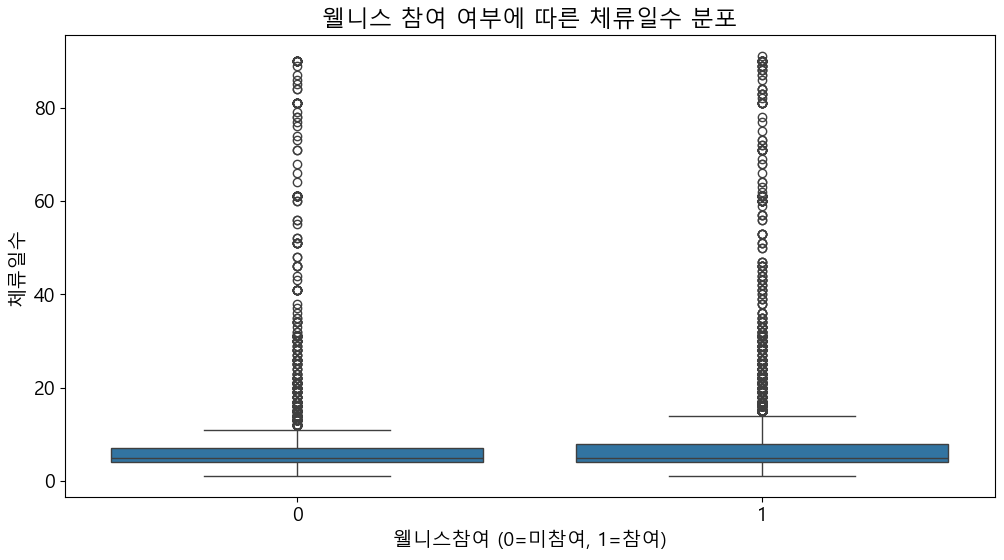

In [26]:
# 웰니스 참여 여부에 따른 체류일수 분포 (평균값 기준)
sns.boxplot(x='웰니스참여', y='M일HAP', data=df_all)
plt.title("웰니스 참여 여부에 따른 체류일수 분포")
plt.xlabel("웰니스참여 (0=미참여, 1=참여)")
plt.ylabel("체류일수")
plt.show()


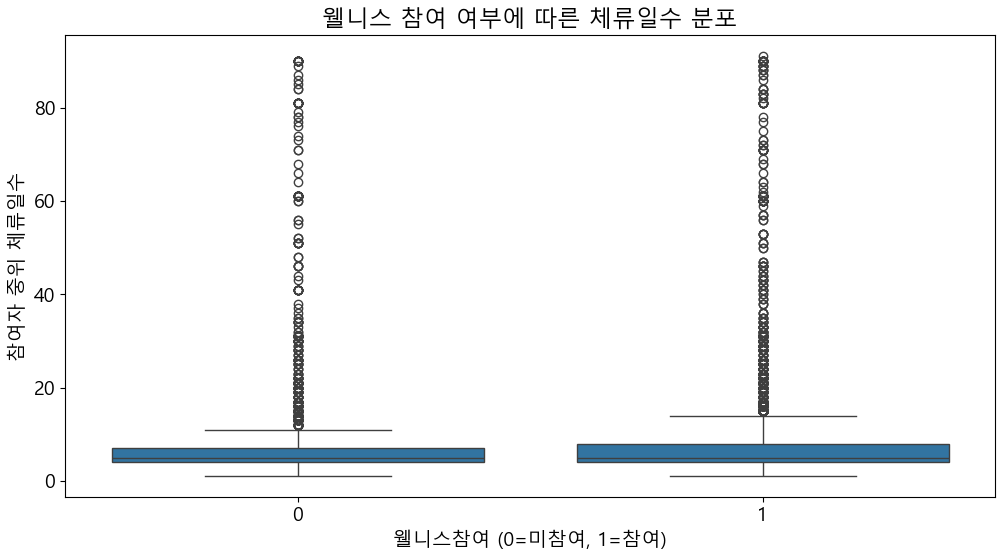

In [27]:
# 웰니스 참여 여부에 따른 체류일수 분포 (중앙값 기준)
sns.boxplot(x='웰니스참여', y='M일HAP', data=df_all)
plt.title("웰니스 참여 여부에 따른 체류일수 분포")
plt.xlabel("웰니스참여 (0=미참여, 1=참여)")
plt.ylabel("참여자 중위 체류일수")
plt.show()


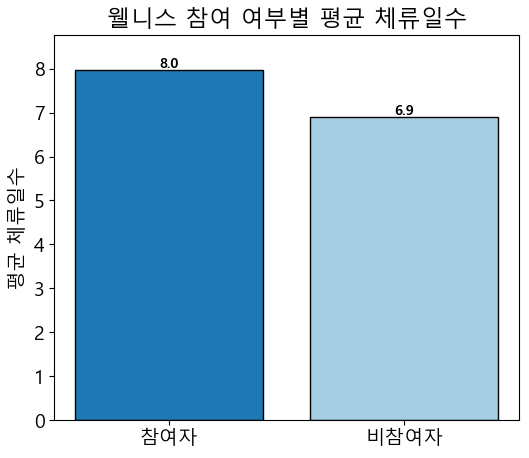

In [28]:
import matplotlib.pyplot as plt

# 평균 계산
means = [g1.mean(), g2.mean()]
labels = ['참여자', '비참여자']

# 막대그래프
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, means, color=['#1f78b4', '#a6cee3'], edgecolor='black')

# 값 표시
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{mean:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylabel('평균 체류일수')
plt.title('웰니스 참여 여부별 평균 체류일수')
plt.ylim(0, max(means) * 1.1)  # 여유 공간

# 그리드 제거
plt.grid(False)

plt.show()


In [29]:
print("참여자 중위 체류일수:", g1.median())
print("비참여자 중위 체류일수:", g2.median())

참여자 중위 체류일수: 5.0
비참여자 중위 체류일수: 5.0


In [30]:
# 효과 크기 계산
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = (((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / (nx + ny - 2))**0.5
    return (x.mean() - y.mean()) / pooled_std

d = cohens_d(g1, g2)
print(f"Cohen's d: {d:.3f}")

Cohen's d: 0.119


In [31]:
# Cliff’s Delta (효과크기)
def cliffs_delta(x, y):
    nx, ny = len(x), len(y)
    more = sum(i > j for i in x for j in y)
    less = sum(i < j for i in x for j in y)
    return (more - less) / (nx * ny)

# 예시: g1, g2는 참여/비참여자 체류일수
delta = cliffs_delta(g1, g2)
print(f"Cliff's Delta: {delta:.3f}")


Cliff's Delta: 0.208


- 체류일수 차이는 통계적으로 유의하긴 하지만 실질적인 차이는 매우 작음

- 웰니스 참여자와 비참여자의 체류일수 분포 차이는 “작은 효과” 수준으로 존재
- 참여 여부에 따른 체류일수 차이는 통계적으로는 유의미하지만, 실질적 크기는 작음

### 웰니스 참여자 vs 비참여자 간의 총소비금액(총액1인TOT항공제외2) 비교

In [32]:
# 그룹 나누기
g1 = df_all[df_all['웰니스참여'] == 1]['총액1인TOT항공제외2'].dropna()
g2 = df_all[df_all['웰니스참여'] == 0]['총액1인TOT항공제외2'].dropna()

In [33]:
from scipy.stats import shapiro

# g1
stat1, p1 = shapiro(g1)
print(f"그룹1(참여자) Shapiro-Wilk: stat={stat1:.4f}, p-value={p1:.4e}")

# g2
stat2, p2 = shapiro(g2)
print(f"그룹2(비참여자) Shapiro-Wilk: stat={stat2:.4f}, p-value={p2:.4e}")


그룹1(참여자) Shapiro-Wilk: stat=0.6867, p-value=5.7915e-71
그룹2(비참여자) Shapiro-Wilk: stat=0.6392, p-value=1.5058e-63


c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5136.
  res = hypotest_fun_out(*samples, **kwds)


In [34]:
stat, p = levene(g1, g2)
print(f"Levene’s test statistic: {stat:.4f}, p-value: {p:.4e}")

if p > 0.05:
    print("등분산성 가정 충족 (p > 0.05)")
else:
    print("등분산성 가정 위배 (p ≤ 0.05)")

Levene’s test statistic: 1.6916, p-value: 1.9343e-01
등분산성 가정 충족 (p > 0.05)


In [35]:
# 평균·중위수 비교
print("참여자 평균 지출:", g1.mean())
print("비참여자 평균 지출:", g2.mean())
print("참여자 중위 지출:", g1.median())
print("비참여자 중위 지출:", g2.median())

참여자 평균 지출: 1425.8381892523364
비참여자 평균 지출: 1381.539875699192
참여자 중위 지출: 1030.2800000000002
비참여자 중위 지출: 941.93


In [36]:
# Mann-Whitney
# 그룹 나누기 
g1 = df_all[df_all['웰니스참여'] == 1]['총액1인TOT항공제외2'].dropna()
g2 = df_all[df_all['웰니스참여'] == 0]['총액1인TOT항공제외2'].dropna()

In [37]:
# Mann-Whitney 
u_stat, p_u = mannwhitneyu(g1, g2, alternative='two-sided')
print("Mann-Whitney U p-value:", p_u)

Mann-Whitney U p-value: 7.742785605265836e-10


- 웰니스 활동 참여 여부에 따라 총지출의 분포에는 유의미한 차이가 존재함
- 평균 지출은 비슷하더라도, 일부 고액 소비자가 참여자 쪽에 더 많이 존재할 가능성이 있음

In [38]:
print("참여자 중위 지출:", g1.median())
print("비참여자 중위 지출:", g2.median())

참여자 중위 지출: 1030.2800000000002
비참여자 중위 지출: 941.93


In [39]:
# 효과 크기
def cliffs_delta(x, y):
    nx, ny = len(x), len(y)
    more = sum(i > j for i in x for j in y)
    less = sum(i < j for i in x for j in y)
    return (more - less) / (nx * ny)

delta = cliffs_delta(g1, g2)
print(f"Cliff's Delta 효과크기: {delta:.3f}")

Cliff's Delta 효과크기: 0.080


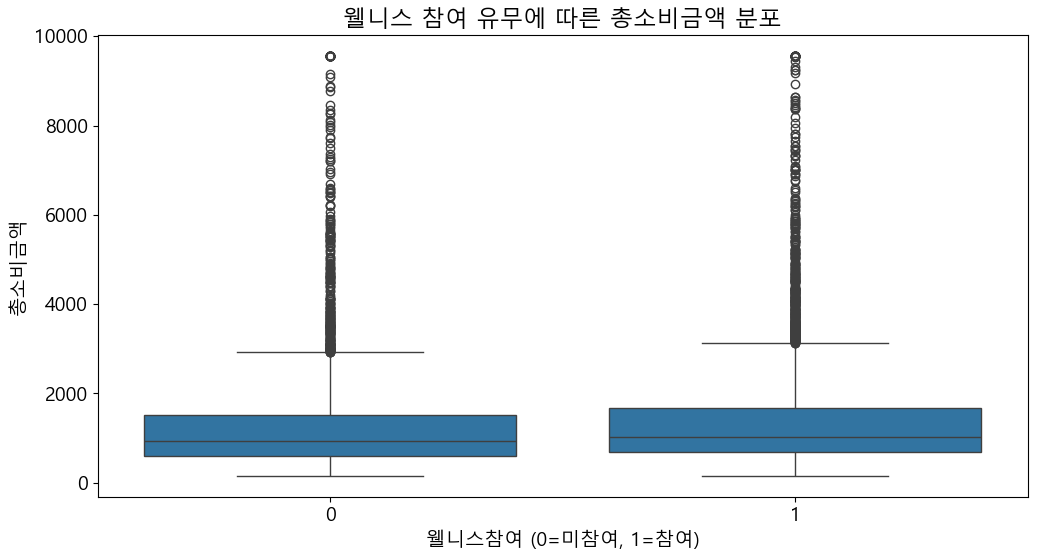

In [40]:
sns.boxplot(x='웰니스참여', y='총액1인TOT항공제외2', data=df_all)
plt.title("웰니스 참여 유무에 따른 총소비금액 분포")
plt.xlabel("웰니스참여 (0=미참여, 1=참여)")
plt.ylabel("총소비금액")
plt.show()

- 웰니스 활동 참여자와 비참여자 간의 총소비지출 평균은 유의미한 차이가 있었으나,
효과 크기(Cliff’s δ = 0.080)가 매우 작아 실질적 차이는 사실상 매우 미미한 수준이다.

### 웰니스 참여자 중 만족자 비율(만족률)
- 웰니스 활동(자연경관 감상, 뷰티/미용 관광)에 참여한 사람 중,
- 실제로 그 활동이 만족도 3순위 안으로 선택되었는지를 보는 것

In [41]:
# 웰니스 참여자 중, 실제로 해당 활동에 대해 만족한 비율을 계산
# 전체 참여자 중 만족자 비율 (전환률)
참여자 = df_all[df_all['웰니스참여'] == 1]
만족도 = 참여자['웰니스만족'].mean()

print(f"웰니스 참여 만족도: {만족도:.2%}")

웰니스 참여 만족도: 75.91%


In [42]:
print(df_all['웰니스참여'].unique())

[0 1]


In [43]:
print(df_all['웰니스참여'].dtype)

int64


In [44]:
print(df_all['웰니스참여'].value_counts())

웰니스참여
1    10826
0     6297
Name: count, dtype: int64


In [45]:
# 확인
print(f"웰니스 참여자 수: {len(참여자)}명")

웰니스 참여자 수: 10826명


In [46]:
# 국가별 참여자 수
참여자수 = df_all[df_all['웰니스참여'] == 1].groupby('국가명')['웰니스만족'].count()
print(참여자수)

국가명
대만      1477
독일       409
미국      1305
베트남      694
싱가포르     993
영국       466
일본      1518
중국      1758
중동       483
태국       841
홍콩       882
Name: 웰니스만족, dtype: int64


In [47]:
# 국가별 만족자 수
# 웰니스 참여자 중 만족한 사람만 필터
만족자 = df_all[(df_all['웰니스참여'] == 1) & (df_all['웰니스만족'] == 1)]

# 국가별 만족자 수
국가별_만족자수 = 만족자.groupby('국가명')['웰니스만족'].count().sort_values(ascending=False)

print(국가별_만족자수)

국가명
중국      1510
대만      1155
일본      1052
미국       886
싱가포르     764
태국       727
홍콩       677
베트남      545
중동       329
영국       306
독일       267
Name: 웰니스만족, dtype: int64


In [48]:
print(len(만족자))

8218


In [49]:
# 국적별 만족도
만족도_국가별 = 참여자.groupby('국가명')['웰니스만족'].mean().sort_values(ascending=False).round(3) * 100
print(만족도_국가별)

국가명
태국      86.4
중국      85.9
베트남     78.5
대만      78.2
싱가포르    76.9
홍콩      76.8
일본      69.3
중동      68.1
미국      67.9
영국      65.7
독일      65.3
Name: 웰니스만족, dtype: float64


In [50]:
# 실제 만족자 수 계산
만족자수 = 참여자[참여자['웰니스만족'] == 1].groupby('국가명')['웰니스만족'].count()

# 만족도(%) 계산용으로 다시 병합
df_전환 = pd.concat([참여자수, 만족자수], axis=1)
df_전환.columns = ['참여자 수', '만족자 수']
df_전환['만족도(%)'] = (df_전환['만족자 수'] / df_전환['참여자 수'] * 100).round(1)

print(df_전환.sort_values('만족도(%)', ascending=False))

      참여자 수  만족자 수  만족도(%)
국가명                       
태국      841    727    86.4
중국     1758   1510    85.9
베트남     694    545    78.5
대만     1477   1155    78.2
싱가포르    993    764    76.9
홍콩      882    677    76.8
일본     1518   1052    69.3
중동      483    329    68.1
미국     1305    886    67.9
영국      466    306    65.7
독일      409    267    65.3


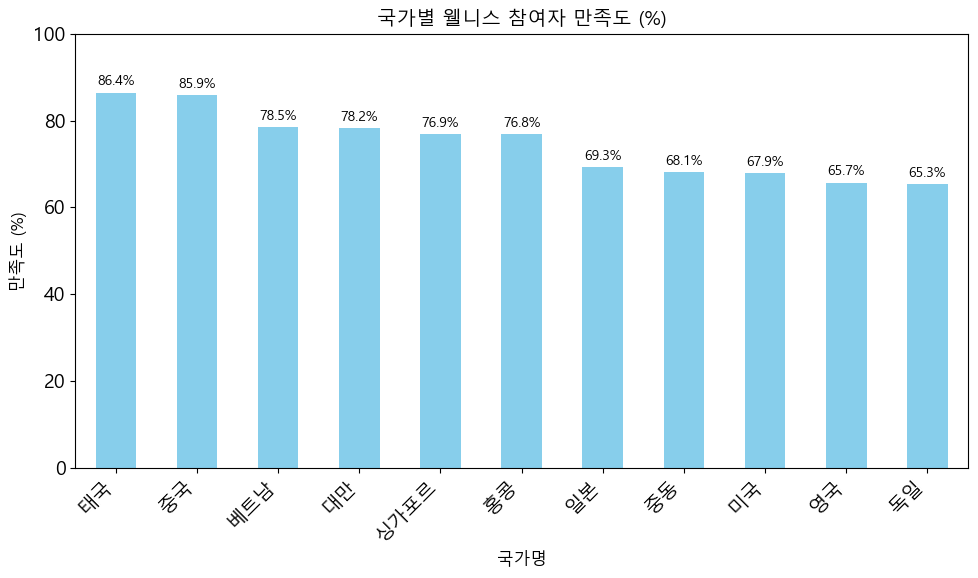

In [51]:
plt.figure(figsize=(10, 6))
만족도_국가별.plot(kind='bar', color='skyblue')

# 제목 및 라벨 설정
plt.title('국가별 웰니스 참여자 만족도 (%)', fontsize=14)
plt.xlabel('국가명', fontsize=12)
plt.ylabel('만족도 (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# 값 표시 (옵션)
for idx, value in enumerate(만족도_국가별):
    plt.text(idx, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [52]:
from scipy.stats import kruskal

# 웰니스 참여자만 필터링
참여자 = df_all[df_all['웰니스참여'] == 1]

# 국가별 그룹 나누기
grouped = 참여자.groupby('국가명')['웰니스만족']

# 국가별 만족도 리스트로 나누기
samples = [group for name, group in grouped]

# Kruskal-Wallis H test 실행
stat, p = kruskal(*samples)

print(f"Kruskal-Wallis H 통계량: {stat:.3f}, p-value: {p:.2e}")

Kruskal-Wallis H 통계량: 304.757, p-value: 1.53e-59


왜 Kruskal-Wallis인가?
웰니스만족은 0과 1로 구성된 순위형 / 이산형 데이터

국가명은 3개 이상 범주형 집단

→ 분포 가정 없이 다집단 비교가 가능한 비모수 검정이 적합

In [53]:
# 동행자유형별 만족도
# 웰니스 참여자만 필터링
참여자 = df_all[df_all['웰니스참여'] == 1]

# 동행자 유형별 만족도 계산
전환률_동행자 = 참여자.groupby('동행자유형')['웰니스만족'].mean().sort_values(ascending=False).round(3) * 100
print(전환률_동행자)

동행자유형
직장동료    83.1
혼자      77.5
가족      75.4
친구      74.8
기타      66.7
Name: 웰니스만족, dtype: float64


In [54]:
# 웰니스 참여자만 필터
참여자 = df_all[df_all['웰니스참여'] == 1]

# 참여자 수 계산
참여자수 = 참여자['동행자유형'].value_counts()

# 만족자 수 계산
만족자수 = 만족자['동행자유형'].value_counts()

# 데이터프레임 병합
df_동행자전환 = pd.concat([참여자수, 만족자수], axis=1)
df_동행자전환.columns = ['참여자 수', '만족자 수']

# 만족도 계산
df_동행자전환['만족도(%)'] = (df_동행자전환['만족자 수'] / df_동행자전환['참여자 수'] * 100).round(1)

# 결과 출력
print(df_동행자전환.sort_values('참여자 수', ascending=False))


       참여자 수  만족자 수  만족도(%)
동행자유형                      
가족      5081   3831    75.4
친구      3201   2394    74.8
혼자      2105   1632    77.5
직장동료     415    345    83.1
기타        24     16    66.7


In [55]:
# 웰니스 참여자만 필터링
참여자 = df_all[df_all['웰니스참여'] == 1]

# 동행자 유형별 참여자 수 계산
참여자수_동행자 = 참여자['동행자유형'].value_counts().sort_values(ascending=False)

print(참여자수_동행자)

동행자유형
가족      5081
친구      3201
혼자      2105
직장동료     415
기타        24
Name: count, dtype: int64


In [56]:
# 웰니스 참여자 중 만족한 사람만 필터링
만족자 = df_all[(df_all['웰니스참여'] == 1) & (df_all['웰니스만족'] == 1)]

# 동행자 유형별 만족자 수 계산
만족자수_동행자 = 만족자['동행자유형'].value_counts().sort_values(ascending=False)

print(만족자수_동행자)

동행자유형
가족      3831
친구      2394
혼자      1632
직장동료     345
기타        16
Name: count, dtype: int64


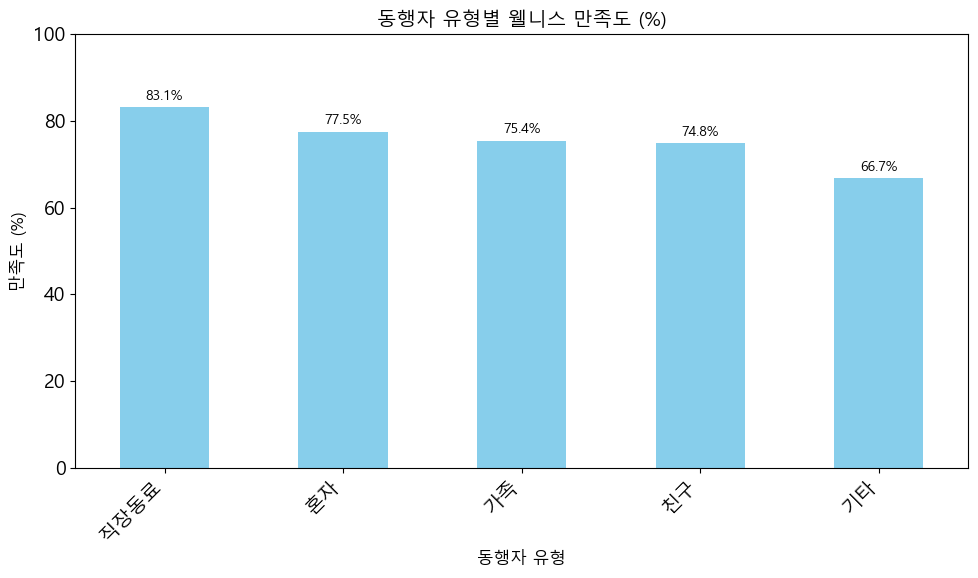

In [57]:
df_동행자전환 = df_동행자전환.rename(columns={'전환률(%)': '만족도(%)'})

# 그래프 그리기
plt.figure(figsize=(10, 6))
df_동행자전환['만족도(%)'].sort_values(ascending=False).plot(kind='bar', color='skyblue')

# 제목, 축 라벨
plt.title('동행자 유형별 웰니스 만족도 (%)', fontsize=14)
plt.xlabel('동행자 유형', fontsize=12)
plt.ylabel('만족도 (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# 막대 위에 값 표시
for idx, value in enumerate(df_동행자전환['만족도(%)'].sort_values(ascending=False)):
    plt.text(idx, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [58]:
from scipy.stats import kruskal

# 웰니스 참여자만 필터링
참여자 = df_all[df_all['웰니스참여'] == 1]

# 동행자 유형별 만족도 값 리스트로 나누기
samples = [group['웰니스만족'].values for name, group in 참여자.groupby('동행자유형')]

# Kruskal-Wallis H test 실행
stat, p = kruskal(*samples)

print(f"Kruskal-Wallis H 통계량: {stat:.3f}, p-value: {p:.2e}")


Kruskal-Wallis H 통계량: 18.904, p-value: 8.21e-04


- 웰니스 활동 참여자의 4명 중 3명 이상이 웰니스 활동을 만족한 활동(Top3) 중 하나로 선택했다는 의미 ->콘텐츠 만족도는 매우 높다고 볼 수 있음
- 동남아 국가군(태국, 베트남, 대만 등)은 참여→만족 전환률이 매우 높아 마케팅 집중 타깃으로 적합
- 서구권 국가군(미국, 유럽 등)은 상대적으로 낮은 편 → 콘텐츠 개선 or 다른 전략 필요
- 직장동료 → 웰니스+팀워크, 리프레시 콘텐츠에 대한 수요 강함
- 혼자/가족 → 개인 힐링, 가족형 콘텐츠로 확장 가능
- 친구 → 감성/경험 중심 웰니스도 효과 있음

- 웰니스 참여가 지출·체류일에 미치는 절대적 효과는 작음 
- 하지만 일부 국적/동행자는 만족도가 확실히 높음
- 컨텐츠 자체가 효율적인 타깃에게만 강하게 작용할 가능성 존재
- 분류 기준(국적/동행자/참여+만족 조합 등)에 따라 세분화해서 분석할 필요가 있어보임
- 어떤 그룹이 참여하고, 만족하고, 체류도 오래하며 소비도 많은가?